# Configuraciones

In [327]:
#pd.set_option('display.max_rows',30 )
#pd.set_option('display.max_columns',30)
#pd.set_option('display.width',30)

In [328]:
print("Run")

Run


# Preprocesamiento

Se parte de un directorio que contiene ficheros de texto. Cada fichero corresponde a los criterios de calidad de un único estudio.Cada criterio está separado en un línea y tiene el formato: "Qx: criterio".

In [329]:
import pandas as pd
import glob, os
files_folder = 'C:\\Users\\alber\\Desktop\\textosQ'
files = []
files = [pd.read_csv(file, delimiter='\t', header=None ) for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
files_df = pd.concat(files)
files_df.columns= ["Criterio"]
files_df.to_csv(r'C:\\Users\\alber\\Desktop\\Definitivo\\src\\dataFrames\\df_total.txt', header=None, index=None, sep='\t')

Con el método anterior, obtenemos un DataFrame que contiene todos los criterios extraidos y lo guardamos como archivo de texto.
Como lo que se busca analizar es el criterio, se elimina la parte "Qx" de las líneas. Además, se eliminan los símbolos que no sean letras y se convierte todo a minúsculas.

In [330]:
files_df['Criterio'] = files_df['Criterio'].str.split(':', expand=True)[1]
files_df['Criterio'] = files_df['Criterio'].str.lower()
files_df['Criterio'] = files_df['Criterio'].str.replace("/"," ")

Se procede a preprocesar el texto

In [331]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [332]:
files_df['tokenized'] = files_df.apply(lambda x: tokenize(x['Criterio']), axis=1)
files_df[['Criterio', 'tokenized']]

,Criterio,tokenized
0,is the objective of the study clear?,"[is, the, objective, of, the, study, clear]"
1,is the dataset size sufficient for this type ...,"[is, the, dataset, size, sufficient, for, this..."
2,is the data collection procedure clearly defi...,"[is, the, data, collection, procedure, clearly..."
3,does the author provide sufficient detail abo...,"[does, the, author, provide, sufficient, detai..."
4,are the threads to validity given?,"[are, the, threads, to, validity, given]"
...,...,...
2,description of the research method.,"[description, of, the, research, method]"
3,evaluation of the research method.,"[evaluation, of, the, research, method]"
4,contributions of the study.,"[contributions, of, the, study]"
5,reporting on the insights derived from the st...,"[reporting, on, the, insights, derived, from, ..."


Se comprueba el número de veces que aparece cada palabra en total. Destacan palabras como the, of e is. Estas palabras son denominadas stop words. Estas palabras no aportan significado al texto y entorpecen el analisis del texto. Por lo tanto tienen que ser eliminadas

In [333]:
import numpy as np
freq = pd.value_counts(np.hstack(files_df['tokenized']))
print(freq.head(20))

the            221
of              75
is              68
research        51
study           40
are             36
clearly         32
and             31
does            27
a               26
there           24
to              23
in              22
defined         17
findings        14
results         13
paper           13
how             13
description     13
clear           13
dtype: int64


En el paquete sporwords de nltk, se encuentran las palabras reconocidas como stop words.

In [334]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
print(stops)

{'because', 'few', 'too', 'don', 'than', 'herself', 'those', 'you', 'had', "needn't", "she's", 'didn', 'his', 'are', 'ourselves', 'further', 'above', 'on', 'up', 'y', 'm', 'but', 'there', 'shan', "shouldn't", "you're", 'mightn', 'off', 'haven', 'very', "don't", 'not', 'o', 'an', 'during', 'and', 'couldn', "didn't", 'whom', 'weren', 'again', 'do', 'while', 'if', 'against', 'by', "you've", 'have', 'both', 'll', 'been', 'other', "shan't", 'these', 'himself', 'was', 'aren', 'me', 'doesn', 'hasn', 'is', "you'd", 'when', 'this', 'for', 'most', 'any', 'ma', 'some', 'him', 'its', "haven't", 'to', 'no', 'so', "doesn't", 'our', 'down', 're', 'wasn', "isn't", 'how', "it's", 'of', 'nor', 'at', 'such', "you'll", 'that', 'before', "hadn't", 'or', 'until', 'more', 'themselves', 'will', 'your', 'just', 'over', 'can', "won't", 'between', "wouldn't", 'hers', 'yourself', 'theirs', 'ours', 'below', 'being', 'each', 'hadn', "that'll", 'under', 'needn', "mightn't", 'same', 'wouldn', 'were', 'her', 'out', 'i

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [335]:
def remove_stopwords(tokenized_column):
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]
files_df['stopwords_removed'] = files_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
files_df[['Criterio', 'stopwords_removed']]

,Criterio,stopwords_removed
0,is the objective of the study clear?,"[objective, study, clear]"
1,is the dataset size sufficient for this type ...,"[dataset, size, sufficient, type, studies]"
2,is the data collection procedure clearly defi...,"[data, collection, procedure, clearly, defined]"
3,does the author provide sufficient detail abo...,"[author, provide, sufficient, detail, experiment]"
4,are the threads to validity given?,"[threads, validity, given]"
...,...,...
2,description of the research method.,"[description, research, method]"
3,evaluation of the research method.,"[evaluation, research, method]"
4,contributions of the study.,"[contributions, study]"
5,reporting on the insights derived from the st...,"[reporting, insights, derived, study]"


Se hace un stemm para eliminar aun mas el posible ruido. Buscar otros stemm para comparar los resultados

In [336]:
def apply_stemming(tokenized_column):
    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

files_df['porter_stemmed'] = files_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
files_df[['stopwords_removed','porter_stemmed']]

,stopwords_removed,porter_stemmed
0,"[objective, study, clear]","[object, studi, clear]"
1,"[dataset, size, sufficient, type, studies]","[dataset, size, suffici, type, studi]"
2,"[data, collection, procedure, clearly, defined]","[data, collect, procedur, clearli, defin]"
3,"[author, provide, sufficient, detail, experiment]","[author, provid, suffici, detail, experi]"
4,"[threads, validity, given]","[thread, valid, given]"
...,...,...
2,"[description, research, method]","[descript, research, method]"
3,"[evaluation, research, method]","[evalu, research, method]"
4,"[contributions, study]","[contribut, studi]"
5,"[reporting, insights, derived, study]","[report, insight, deriv, studi]"


Se agrupa los elementos de la lista de stemms para que formen un solo String

In [337]:
def rejoin_words(tokenized_column):
    return ( " ".join(tokenized_column))

files_df['rejoined_porter'] = files_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
files_df[['Criterio', 'rejoined_porter']]

,Criterio,rejoined_porter
0,is the objective of the study clear?,object studi clear
1,is the dataset size sufficient for this type ...,dataset size suffici type studi
2,is the data collection procedure clearly defi...,data collect procedur clearli defin
3,does the author provide sufficient detail abo...,author provid suffici detail experi
4,are the threads to validity given?,thread valid given
...,...,...
2,description of the research method.,descript research method
3,evaluation of the research method.,evalu research method
4,contributions of the study.,contribut studi
5,reporting on the insights derived from the st...,report insight deriv studi


In [338]:
files_df['rejoined_porter'].describe()

count                              165
unique                             164
top       clear statement aim research
freq                                 2
Name: rejoined_porter, dtype: object

In [339]:
sinonimos = pd.value_counts(np.hstack(files_df['rejoined_porter']))
print(sinonimos.head(5))


clear statement aim research            2
object studi clear                      1
find research clearli state             1
find result explicitli mention studi    1
argument studi adequ present justifi    1
dtype: int64


Se preprocesa el texto de otra forma para comparar los resultados. Se prueba que lemmatizar es ejor que stemmatizar, pues al hacer lo último se puede perder el significado de las palabras.
#### Definir lammatizar y stemmificar.

In [340]:
df2 = pd.concat(files)
df2.columns= ["Criterio"]
df2['Criterio'] = df2['Criterio'].str.split(':', expand=True)[1]


In [341]:
import string, re
from nltk.stem import WordNetLemmatizer
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df2['clean_msg']= df2['Criterio'].apply(lambda x:remove_punctuation(x))
df2['msg_lower']= df2['clean_msg'].apply(lambda x: x.lower())
df2['msg_tokenized'] = files_df.apply(lambda x: tokenize(x['Criterio']), axis=1)
df2['stopwords_removed'] = df2.apply(lambda x: remove_stopwords(x['msg_tokenized']), axis=1)
df2['msg_lemmatized']=df2['stopwords_removed'].apply(lambda x:lemmatizer(x))
df2['rejoined_lemma'] = df2.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)
df2[['stopwords_removed','rejoined_lemma']]

,stopwords_removed,rejoined_lemma
0,"[objective, study, clear]",objective study clear
1,"[dataset, size, sufficient, type, studies]",dataset size sufficient type study
2,"[data, collection, procedure, clearly, defined]",data collection procedure clearly defined
3,"[author, provide, sufficient, detail, experiment]",author provide sufficient detail experiment
4,"[threads, validity, given]",thread validity given
...,...,...
2,"[description, research, method]",description research method
3,"[evaluation, research, method]",evaluation research method
4,"[contributions, study]",contribution study
5,"[reporting, insights, derived, study]",reporting insight derived study


In [342]:
df2['rejoined_lemma'].describe()

count                              165
unique                             164
top       clear statement aim research
freq                                 2
Name: rejoined_lemma, dtype: object

In [343]:
sinonimos2 = pd.value_counts(np.hstack(df2['rejoined_lemma']))
print(sinonimos2.head(5))

clear statement aim research                     2
objective study clear                            1
finding research clearly stated                  1
finding result explicitly mentioned study        1
argument study adequately presented justified    1
dtype: int64


Estadísticas de los dataframes files_df y df2 tras lemma y stem

In [344]:
freq_df1 = pd.value_counts(np.hstack(files_df['porter_stemmed']))
print(freq_df1.head(20))

research    53
studi       46
clearli     32
defin       19
find        15
result      14
object      13
clear       13
use         13
work        13
paper       13
descript    13
adequ       12
limit       12
state       12
valid       11
data        11
context     11
present     11
aim         11
dtype: int64


In [345]:
freq_df2 = pd.value_counts(np.hstack(df2['msg_lemmatized']))
print(freq_df2.head(20))

research       51
study          46
clearly        32
defined        17
finding        15
result         14
objective      13
paper          13
clear          13
work           13
description    13
stated         12
context        11
aim            11
used           11
limitation     11
data           11
author         10
method         10
well            9
dtype: int64


# Primera fase Análisis

## Preparación

In [346]:
df2['rejoined_lemma'].to_csv(r'C:\\Users\\alber\\Desktop\\Definitivo\\src\\dataFrames\\corpus.txt', header=None, index=None, sep='\t')

In [347]:
text= open('C:\\Users\\alber\\Desktop\\Definitivo\\src\\dataFrames\\corpus.txt',"r")
corpus = text.readlines()
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [348]:
sentence_vectors = []
for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in wordfreq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)


## TF-IDF

Construir el vocabulario y vectorizar los criterios

In [349]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(corpus)
X.toarray()
bag_of_words = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names_out())

Se calcula TF
‘l2’: Sum of squares of vector elements is 1. The cosine similarity between two vectors is their dot product when l2 norm has been applied.
‘l1’: Sum of absolute values of vector elements is 1. See preprocessing.normalize.

In [350]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(corpus)
matriz_tf=pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

idf_vectorizer = TfidfVectorizer(use_idf=True,norm='l1')
Y = idf_vectorizer.fit_transform(corpus)
idf_df = pd.DataFrame(Y.toarray(), columns=idf_vectorizer.get_feature_names_out())
#matriz_tf['clear'][:1]
matriz_tf


,acceptable,achieve,add,address,addressed,adequate,adequately,aim,algorithm,among,analysis,analyze,analyzed,application,applied,...,use,used,useful,user,validated,validation,validity,valuable,value,variability,well,word,work,write,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bigramas y Trigramas


In [351]:
from nltk.util import ngrams
for line in corpus:
    token = nltk.word_tokenize(line)
    bigrama = list(ngrams(token,2))
bigrama

[('reporting', 'limitation'),
 ('limitation', 'study'),
 ('study', 'threat'),
 ('threat', 'validity')]

Text(0.5, 0, 'Nº de apariciones')

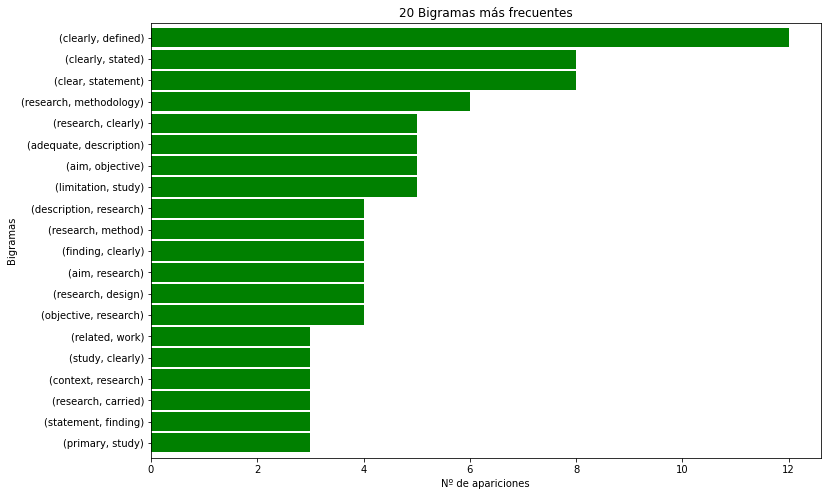

In [352]:
import matplotlib.pyplot as plt
import re
def palabrizar(text):
    words = re.sub(r'[^\w\s]', '', text).split()
    return [word for word in words]

df_corpus = pd.read_csv('C:\\Users\\alber\\Desktop\\Definitivo\\src\\dataFrames\\corpus.txt')
df_corpus.columns = ['tokens']
pal = palabrizar(''.join(str(df_corpus['tokens'].tolist())))
bigramas = pd.Series(nltk.ngrams(pal, 2)).value_counts()[:20]
bigramas.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('20 Bigramas más frecuentes')
plt.ylabel('Bigramas')
plt.xlabel('Nº de apariciones')


Text(0.5, 0, 'Nº de apariciones')

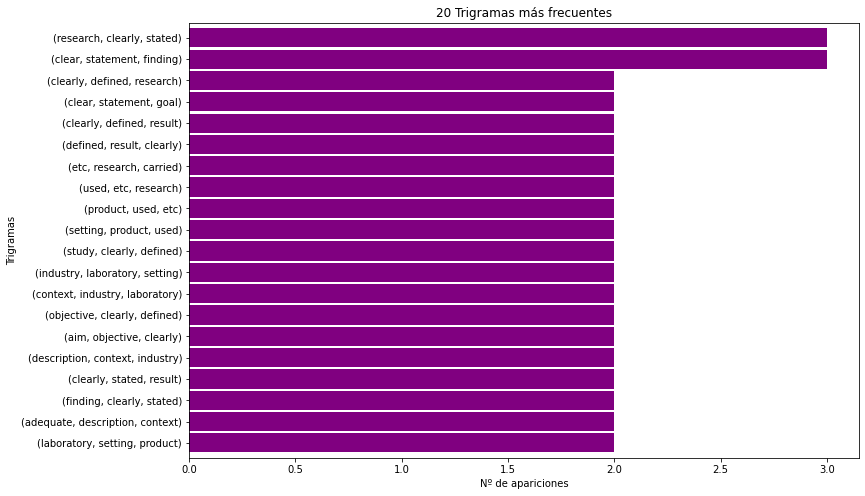

In [353]:
trigramas = pd.Series(nltk.ngrams(pal, 3)).value_counts()[:20]
trigramas.sort_values().plot.barh(color='purple', width=.9, figsize=(12, 8))
plt.title('20 Trigramas más frecuentes')
plt.ylabel('Trigramas')
plt.xlabel('Nº de apariciones')

## Similitud entre palabras / Sinonimia

In [354]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [355]:
lista_sinonimos = []
for key in wordfreq:
    synonyms = []
    synonyms.append(key)
    for syn in wordnet.synsets(key):
        for lm in syn.lemmas():
            if lm.name() in wordfreq:
                 synonyms.append(lm.name())
    lista_sinonimos.append(list(dict.fromkeys(synonyms)))
result = sorted(lista_sinonimos, key = len,reverse=True)
#print([x for x in connections if len(x) > 3])
result = [x for x in result if len(x) > 1 ]

## Distancias


### Coseno/Cosine

from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(bag_of_words)
cosine_similarity = pd.DataFrame(similarity)
inx=0
while inx < len(cosine_similarity):
    cosine_similarity.columns.values[inx] = str(inx)
    inx += 1
cosine_similarity

In [356]:
from sklearn.metrics.pairwise import cosine_similarity
def calcular_distacia(dataframe):
    similarity = cosine_similarity(dataframe)
    cosine_similarity_df = pd.DataFrame(similarity)
    inx=0
    while inx < len(cosine_similarity_df):
        cosine_similarity_df.columns.values[inx] = str(inx)
        inx += 1
    return cosine_similarity_df
cosine_similarity_dist = calcular_distacia(bag_of_words)
cosine_similarity_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164
0,1.000000,0.258199,0.0,0.0,0.000000,0.333333,0.235702,0.000000,0.000000,0.0,0.258199,0.235702,0.258199,0.577350,0.258199,...,0.0,0.000000,0.333333,0.333333,0.0,0.235702,0.235702,0.258199,0.333333,0.000000,0.000000,0.000000,0.408248,0.288675,0.258199
1,0.258199,1.000000,0.0,0.2,0.000000,0.258199,0.182574,0.000000,0.000000,0.0,0.200000,0.182574,0.200000,0.223607,0.200000,...,0.0,0.000000,0.000000,0.258199,0.0,0.182574,0.182574,0.200000,0.258199,0.000000,0.000000,0.000000,0.316228,0.223607,0.200000
2,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.182574,0.447214,0.258199,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.182574,0.000000,0.000000,0.0,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.200000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.182574,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,1.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.235702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.258199,0.000000,0.258199,...,0.0,0.235702,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,0.000000
161,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.258199,0.000000,0.258199,...,0.0,0.235702,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000,0.000000,0.000000,0.000000
162,0.408248,0.316228,0.0,0.0,0.000000,0.408248,0.288675,0.000000,0.000000,0.0,0.316228,0.288675,0.316228,0.353553,0.316228,...,0.0,0.000000,0.000000,0.408248,0.0,0.288675,0.288675,0.316228,0.408248,0.000000,0.000000,0.000000,1.000000,0.353553,0.316228
163,0.288675,0.223607,0.0,0.0,0.000000,0.288675,0.204124,0.000000,0.000000,0.0,0.223607,0.204124,0.223607,0.250000,0.223607,...,0.0,0.000000,0.000000,0.288675,0.0,0.204124,0.204124,0.223607,0.288675,0.288675,0.000000,0.000000,0.353553,1.000000,0.447214


In [357]:
cosine_similarity_dist.index = df2['rejoined_lemma'].tolist()
def cluster_sinonimos(criterio,umbral,dataframe):
    df_mask=dataframe[criterio]>=umbral #Criterio del que se quieren saber los más similares
    filtered_df = dataframe[df_mask].index.to_list()
    return filtered_df
#df2.iloc[82] #Saber el criterio a partir de su ID
print(cluster_sinonimos(0,0.5,cosine_similarity_dist))


['objective study clear', 'clarity aim objective study', 'objective clear primary study']


### Manhattam

In [358]:
def manhattan_distance(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

def xtrain_distance(row):
    distances = {}
    for i,each in bag_of_words.iterrows():
        distances[i] = manhattan_distance(each,row)
    return distances

result_M = bag_of_words.apply(xtrain_distance, axis=1)
manhattan_distance = pd.DataFrame(dict(result_M))
manhattan_distance.index = df2['rejoined_lemma'].tolist()

In [359]:
df_mask=manhattan_distance[0]<4 #Criterio del que se quieren saber los más similares
filtered_df = manhattan_distance[df_mask]
filtered_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164
objective study clear,0,6,8,8,6,4,7,7,6,6,6,7,6,3,6,...,5,9,4,4,9,7,7,6,4,6,6,6,3,5,6
clarity aim objective study,3,7,9,9,7,5,8,8,7,7,7,8,7,0,7,...,6,8,7,5,10,8,8,7,5,7,7,7,4,6,7
objective clear primary study,1,7,9,9,7,5,8,8,7,7,7,8,7,4,7,...,6,10,5,5,10,8,8,7,5,7,7,7,4,6,7
contribution study,3,5,7,7,5,3,6,6,5,5,5,6,5,4,5,...,4,8,5,3,8,6,6,5,3,5,5,5,0,4,5


In [360]:
#df2.to_csv('C:\\Users\\alber\\Desktop\\Definitivo\\src\\dataFrames\\df2.txt')

# Segunda fase de Análisis

## Clusters pre-reducción

In [361]:
def eliminar_elemento_lista(elem,lista):
    return [[ele for ele in sub if ele != elem] for sub in lista]

In [362]:
import networkx as nx
def combinar_mismos_elem(lista):
    g = nx.Graph()
    ret = []
    for sublista in lista:
        g.add_edges_from(zip(sublista, sublista[1:]))
    for c in nx.connected_components(g):
        ret.append(c)
    return ret
#print(combinar_mismos_elem())

In [363]:
def cluster_fichero(cluster,camino):    
    textfile = open('C:\\Users\\alber\\Desktop\\'+camino+'.txt', "w")
    for element in cluster:
        for elem in element:
            textfile.write(elem + "\n")
        textfile.write("************************************************* \n")
    textfile.close()

In [364]:
def fichero_cluster(dataframe,umbral):
    cluster_pre= [] # Obtener un fichero con los clusters
    for row in dataframe:
        cluster_criterio = cluster_sinonimos(row,umbral,dataframe)
        cluster_pre.append(cluster_criterio)
    cluster_pre = [x for x in cluster_pre if len(x) > 1 ]
    cluster_pre = sorted(cluster_pre, key = len,reverse=True)
    return cluster_pre
cluster = fichero_cluster(cosine_similarity_dist,0.9)
cluster=combinar_mismos_elem(cluster)
print(cluster)
cluster_fichero(cluster,'0,9prered')

[{'adequate description context industry laboratory setting product used etc research carried', 'description context industry laboratory setting product used etc research carried'}, {'clear statement aim research'}]


## 1ª Reducción de matrices por sinónimos

La lista de sinónimos está en result, ordenada de mayor a menor número de sinónimos

Hay 113 grupos de sinónimos, y 288 palabras en total, por lo que 175 palabras no tienen un sinónimo en el vocabulario

Combinacion de sets

In [365]:
paprint=combinar_mismos_elem(result)
print(paprint)

[{'solve', 'work', 'portrayed', 'report', 'purpose', 'covered', 'analyzed', 'target', 'realized', 'contribute', 'used', 'proposed', 'speech', 'test', 'conduct', 'clearly', 'describe', 'defining', 'identified', 'clear', 'role', 'define', 'add', 'defined', 'place', 'deliberate', 'limit', 'present', 'specified', 'learning', 'make', 'identify', 'reporting', 'use', 'limitation', 'title', 'background', 'design', 'objective', 'practice', 'given', 'address', 'setting', 'applied', 'set', 'study', 'considered', 'described', 'restriction', 'presented', 'context', 'testing', 'claim', 'examine', 'taken', 'conducted', 'addressed', 'conveyed', 'reported', 'carried', 'influence', 'paper', 'analyze', 'aim'}, {'solution', 'outcome', 'result', 'issue'}, {'well', 'best', 'expert'}, {'possible', 'potential', 'likely'}, {'focus', 'management', 'direction', 'focused'}, {'parameter', 'statement', 'argument'}, {'conclusion', 'goal', 'end'}, {'evaluated', 'value', 'evaluate'}, {'explored', 'research', 'search'}

### Añadir manualmente research como sinónimo de study, porque no consta como sinonimo uno de otro
### Añadir manualmente aim como sinonimo de goal

Encontrar ocurrencias de una palabra en los sets de sinonimos

In [366]:
def encontrar_syn(result,palabra):
    for lista in result:
        if palabra in lista:
            print(lista)
print(encontrar_syn(result,'goal'))

['end', 'goal', 'conclusion']
['goal', 'end']
None


In [367]:
def seleccion_df(lista,dataframe):
    df = dataframe.filter(lista,axis=1)
    return df
def cluster_sin(dataframe, lista):
    reducto = seleccion_df(lista,dataframe)
    nombre = lista[0]+" syn"
    dataframe[nombre] = reducto.sum(axis=1)
   # dataframe=dataframe.drop(lista,axis=1)
    return dataframe
def deslistar(lista):
    return [elem for sublist in lista for elem in sublist]
matriz_1red = bag_of_words.copy()
lista = result
for sublist in result:
    matriz_1red=cluster_sin(matriz_1red,sublist)
listaflat= deslistar(result)
matriz_1red= matriz_1red.drop(listaflat,axis=1)


In [368]:
distancia_1red= calcular_distacia(matriz_1red)
distancia_1red.index = df2['rejoined_lemma'].tolist()
cluster1red = fichero_cluster(distancia_1red,0.9)
cluster1red=combinar_mismos_elem(cluster1red)
print(cluster1red)
cluster_fichero(cluster1red,'0,91red')

[{'objective study clear', 'objective clear primary study'}, {'limitation study given', 'limitation study specified'}, {'study recommend research', 'research contribution study'}, {'aim objective clearly defined authored clearly defined aim objective', 'research aim objective clearly defined'}, {'rationale study undertaken', 'rationale provided study undertaken'}, {'adequate description context industry laboratory setting product used etc research carried', 'description context industry laboratory setting product used etc research carried'}, {'limitation credibility study discussed explicitly', 'limitation study discussed explicitly'}, {'clear statement aim research'}, {'contribution study clearly defined', 'problem study clearly defined'}, {'clear statement finding', 'finding stated clearly clear statement finding'}, {'adequate description context research carried', 'adequate description research context'}]


## 2ª Reducción, clusters de sinónimos duplicados

In [369]:
repeticiones = result.copy()
repe = []
for sublist in repeticiones:
    for sub in repeticiones:
        if (sorted(sub) == sorted(sublist)) and sublist!=sub:
            repe.append(sub)
print(len(repeticiones))
for lista in repe:
    repeticiones.remove(lista)
len(repeticiones)

115


85

In [370]:
df_eliminar=[]
for sublista in repe:
    df_eliminar.append(sublista[0]+" syn")
matriz_2red = matriz_1red.copy()
matriz_2red= matriz_2red.drop(df_eliminar,axis=1)

In [371]:
distancia_2red= calcular_distacia(matriz_2red)
distancia_2red.index = df2['rejoined_lemma'].tolist()
cluster2red = fichero_cluster(distancia_2red,0.9)
cluster2red=combinar_mismos_elem(cluster2red)
print(cluster2red)
cluster_fichero(cluster2red,'0,92red')

[{'limitation study given', 'limitation study specified', 'author present study limitation'}, {'study recommend research', 'contribution study', 'research contribution study'}, {'objective study clear', 'objective clear primary study'}, {'aim objective clearly defined authored clearly defined aim objective', 'research aim objective clearly defined'}, {'rationale study undertaken', 'rationale provided study undertaken'}, {'adequate description context industry laboratory setting product used etc research carried', 'description context industry laboratory setting product used etc research carried'}, {'limitation credibility study discussed explicitly', 'limitation study discussed explicitly'}, {'clear statement aim research'}, {'contribution study clearly defined', 'problem study clearly defined'}, {'clear statement finding', 'finding stated clearly clear statement finding'}]


## 3ª Reduccion, study, research, clear, clearly, defined

In [383]:
terminos_frecuentes = ['study', 'research','clear','clearly','defined']
matriz_3red= bag_of_words.copy()
matriz_3red = matriz_3red.drop(terminos_frecuentes,axis=1)

In [384]:
result3=result.copy()
eliminar_frec=[]
for sublista in result:
    if sublista[0] in terminos_frecuentes:
        result3.remove(sublista)
result3=eliminar_elemento_lista('study',result3)
result3=eliminar_elemento_lista('research',result3)
result3=eliminar_elemento_lista('clear',result3)
result3=eliminar_elemento_lista('clearly',result3)
result3=eliminar_elemento_lista('defined',result3)
for sublist in result3:
    matriz_3red=cluster_sin(matriz_3red,sublist)
listaflat3= deslistar(result3)
matriz_3red= matriz_3red.drop(listaflat3,axis=1)

distancia_3red= calcular_distacia(matriz_3red)
distancia_3red.index = df2['rejoined_lemma'].tolist()

In [386]:
cluster3red = fichero_cluster(distancia_3red,0.9)
cluster3red=combinar_mismos_elem(cluster3red)
print(cluster3red)
cluster_fichero(cluster3red,'0,93red')


[{'aim objective clearly defined authored clearly defined aim objective', 'research aim objective clearly defined', 'clarity aim objective study'}, {'contribution study clearly defined', 'contribution study', 'research contribution study'}, {'objective study clear', 'objective research clearly defined'}, {'result finding clearly stated study', 'result clearly stated'}, {'adequate description context industry laboratory setting product used etc research carried', 'description context industry laboratory setting product used etc research carried'}, {'limitation credibility study discussed explicitly', 'limitation study discussed explicitly'}, {'clear statement aim research'}, {'aim research clearly stated', 'aim study stated clearly'}, {'adequate description context research carried', 'adequate description research context'}]


### Sinonimia study y research, clear, clearly

In [375]:
result4=result.copy()
eliminar_frec=[]
for sublista in result4:
    if sublista[0]=='study':
        sublista.append('research')
    elif sublista[0]=='research':
        sublista.append('study')
matriz_4red= bag_of_words.copy()
for sublist in result4:
    matriz_4red=cluster_sin(matriz_4red,sublist)
listaflat4= deslistar(result4)
matriz_4red= matriz_4red.drop(listaflat4,axis=1)

distancia_4red= calcular_distacia(matriz_4red)
distancia_4red.index = df2['rejoined_lemma'].tolist()



In [379]:
cluster4red = fichero_cluster(distancia_4red,0.8)
cluster4red=combinar_mismos_elem(cluster4red)
print(cluster4red)
cluster_fichero(cluster4red,'0,94red')

[{'literature search likely covered relevant study', 'relevancy research design study context', 'study recommend research', 'limitation study given', 'problem definition study', 'contribution study', 'reporting insight derived study', 'limitation study specified', 'study adequately referenced', 'contribution study clearly defined', 'problem study clearly defined', 'study provide tool source code online', 'basic data study adequately described', 'study provide description one defined research question', 'reporting limitation study threat validity', 'rationale study undertaken', 'study cited author', 'study assessment explicitly reported', 'study explicitly stated problem', 'limitation study discussed explicitly', 'study contribute literature', 'limitation credibility study discussed explicitly', 'author present study limitation', 'research finding identified limitation study', 'study add value existing literature', 'sufficient description research methodology included study', 'research 

## Distancias con Tf-Idf